<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/06_LogisticRegression_iPhone_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


# 0 . Load library

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [0]:
data = pd.read_csv('DS102.K21/iphone_purchase_records.csv')

In [0]:
data_train = data[0:300]
data_train

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
295,Female,36,63000,0
296,Male,42,73000,1
297,Female,43,112000,1
298,Male,45,79000,0


In [0]:
data_test = data[300:]
data_test

,Gender,Age,Salary,Purchase Iphone
300,Female,58,38000,1
301,Male,48,74000,1
302,Female,37,137000,1
303,Male,37,79000,1
304,Female,40,60000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [0]:
X_train = np.array(data_train.iloc[:,1:-1].values)
X_train.shape

(300, 2)

In [0]:
y_train = np.array(data_train.iloc[:,-1].values)
y_train.shape

(300,)

In [0]:
X_test = np.array(data_test.iloc[:,1:-1].values)
X_test.shape

(100, 2)

In [0]:
y_test = np.array(data_test.iloc[:,-1].values)
y_test.shape

(100,)

# 2 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train)

# 3 . Build and Training model

In [0]:
model = LogisticRegression(random_state = 0)

In [0]:
model = model.fit(X_train, y_train)

# 4 . Visualize data

In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green'))(i))
        plt.legend(np.unique(y_))

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green')))

Text(0.5, 1.0, 'Train model')

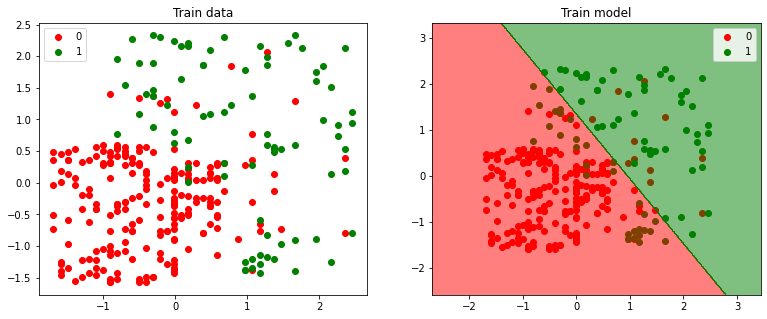

In [0]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
VisualizingDataset(X_train, y_train)
plt.title('Train data')
plt.subplot(1,3,2)
VisualizingDataset(X_train, y_train)
VisualizingResult(model, X_train)
plt.title('Train model')

# 5 . Evaluate model

Accuracy score in train data:  0.86
Confusion matrix in train data: 
 [[208  11]
 [ 31  50]]


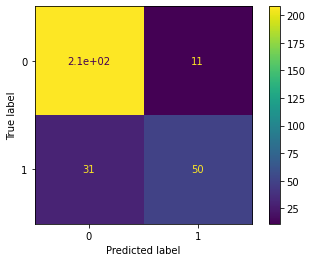

In [0]:
y_train_pred = model.predict(X_train)
print('Accuracy score in train data: ', accuracy_score(y_train, y_train_pred))
print('Confusion matrix in train data: \n', confusion_matrix(y_train, model.predict(X_train)))
plot_confusion_matrix(model, X_train, y_train)

Accuracy score in test data:  0.62
Confusion matrix in test data: 
 [[ 0 38]
 [ 0 62]]


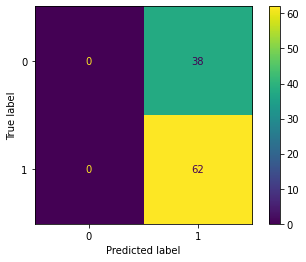

In [0]:
y_test_pred = model.predict(X_test)
print('Accuracy score in test data: ', accuracy_score(y_test, y_test_pred))
print('Confusion matrix in test data: \n', confusion_matrix(y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, y_test)